## transferlearning_002.ipynb

#### transferlearning_001에서는 원래 데이터셋에서 10%만의 데이터로 학습을 시키더라도
#### 우리가 직접 만들어본 모델에 원래 데이터셋을 학습시킨 것보다 더 좋은 성능 가진 다는 것을
#### transfer learning (전이학습)을 통해 알게 되었습니다. 
### feature extraction이 잘 되었다!

#### 이번 transfer learning 에서는 fine-tuning이라는 기법을 알아보려고 합니다.

In [1]:
from helper_functions import unzip_data, walk_through_dir, create_tensorboard_callback, plot_loss_curves

In [2]:
!wget -q https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [3]:
unzip_data("10_food_classes_10_percent.zip")

In [2]:
walk_through_dir("10_food_classes_10_percent")

10_food_classes_10_percent 폴더에는 2개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent\test 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_curry 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_wings 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\fried_rice 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\grilled_salmon 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\hamburger 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ice_cream 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\pizza 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ramen 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\steak 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\sushi 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_10_percent\train 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_10_percent\train\chicken_curry 폴더에는 0개의 폴더와 75개의 파일이 존재합니다.
10_food_classes_10_percent\t

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 30

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# transferlearning_001까지, 즉 지금까지 ImageDataGenerator를 사용했습니다.
# 잘 동작도 하고 많이 사용하는 방법입니다.
# transferlearning_002에서는 image_data_from_directory 라는 함수를 사용해 보겠습니다.

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### ImageDataGenerator : python generator
### tf.keras.preprocessing.image_dataset_from_directory : tf.data.Dataset 오브젝트

#### tf.data.Dataset API는 큰 데이터셋에 대해서 좀더 효율적입니다. 그래서 많이 사용합니다.
#### tf.data.Dataset API는 관련된 메서드들이 많이 존재합니다.

In [5]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

#### (None, 224, 224, 3) : None은 배치사이즈, 224는 높이, 224는 너비, 3은 컬러 채널(RGB)인 이미지의 텐서 shape)
#### (None, 10) : None은 배치 사이즈, 10은 가능한 리벨의 갯수 (우리가 실습하는 데이터셋은 10개의 종류가 있는 것을 자동으로 판단)인 텐서 shape
#### 이 텐서들은 모두 tf.float32 자료형을 가지고 있습니다.

#### batch_size가 None인 이유 : 학습하는 동안에만 사용하기 때문입니다.
#### None의 의미는 placeholder

In [6]:
# class_names() 메서드 : 클래스 목록화

train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
# take() 메서드 : 데이터 배치의 사례를 확인하고자 할 때 사용
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[6.42857194e-01 2.64285707e+00 1.64285719e+00]
   [1.00000000e+00 3.00000000e+00 2.00000000e+00]
   [1.00000000e+00 3.00000000e+00 2.00000000e+00]
   ...
   [1.68571205e+01 1.96428566e+01 8.00006580e+00]
   [5.78567505e+00 1.07856750e+01 3.78567505e+00]
   [2.71432066e+00 8.94390011e+00 4.25516176e+00]]

  [[0.00000000e+00 2.00000000e+00 1.00000000e+00]
   [1.00000000e+00 3.00000000e+00 2.00000000e+00]
   [7.85714149e-01 2.78571415e+00 1.78571415e+00]
   ...
   [1.51734447e+01 1.79591808e+01 6.33169317e+00]
   [5.79079103e+00 1.07907915e+01 3.79079103e+00]
   [4.31126165e+00 1.13112621e+01 4.31126165e+00]]

  [[0.00000000e+00 2.00000000e+00 2.14285851e-01]
   [9.43877757e-01 2.94387770e+00 4.28571701e-01]
   [1.68367445e-01 2.16836739e+00 3.82653236e-01]
   ...
   [1.41937780e+01 1.69795132e+01 5.55098629e+00]
   [4.14284420e+00 9.14284420e+00 2.14284420e+00]
   [2.64800167e+00 9.64800167e+00 2.64800167e+00]]

  ...

  [[1.12581635e+02 8.12245178e+01 5.58163023e+00]
   [1

In [6]:
# Model 0
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
# 네트워크의 마지막 레이어 (출력층)를 개발자가 직접 만들겠다. 

base_model.trainable = False
# 사전에 학습한 모델의 모든 가중치를 고정하겠다, 즉 변경하지 않겠다.

inputs = tf.keras.layers.Input(
    shape = (224, 224, 3),
    name = "input_layer"
)

# rescaling, normalization은 모델이 필요할 때 사용합니다.
# efficientnet의 경우는 필요없고, 나머지는 필요합니다.


x = base_model(inputs)
print(f"base_model의 shape : {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

print(f"global_average_pooling_layer이후의 shape {x.shape}")

outputs = tf.keras.layers.Dense(
    10, 
    activation="softmax", 
    name = "output_layer"
)(x)

model_0 = tf.keras.Model(inputs, outputs)
# Functional API 방식으로 모델을 만든 것입니다.

model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [create_tensorboard_callback(
        "transfer_learning", "10_percent_feature_extract"
    )]
)


base_model의 shape : (None, 7, 7, 1280)
global_average_pooling_layer이후의 shape (None, 1280)
TensorBoard 로그 파일을 저장한 디렉토리 : transfer_learning/10_percent_feature_extract/20210619-150858
c:\200210619_1\venv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
Epoch 1/5
25/25 [==============================] - 207s 8s/step - loss: 1.8625 - accuracy: 0.4253 - val_loss: 1.3055 - val_accuracy: 0.7252
Epoch 2/5
25/25 [==============================] - 199s 8s/step - loss: 1.0982 - accuracy: 0.7413 - val_loss: 0.8959 - val_accuracy: 0.7996
Epoch 3/5
25/25 [==============================] - 206s 8s/step - loss: 0.8129 - accuracy: 0.8067 - val_loss: 0.7341 - val_accuracy: 0.8228
Epoch 4/5
25/25 [==============================] - 201s 8s/step - lo

In [7]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [9]:
base_model.summary()

e_expand[0][0]          
__________________________________________________________________________________________________
block5b_project_conv (Conv2D)   (None, None, None, 1 75264       block5b_se_excite[0][0]          
__________________________________________________________________________________________________
block5b_project_bn (BatchNormal (None, None, None, 1 448         block5b_project_conv[0][0]       
__________________________________________________________________________________________________
block5b_drop (Dropout)          (None, None, None, 1 0           block5b_project_bn[0][0]         
__________________________________________________________________________________________________
block5b_add (Add)               (None, None, None, 1 0           block5b_drop[0][0]               
                                                                 block5a_project_bn[0][0]         
____________________________________________________________________________________

In [11]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name)

0 input_layer
1 efficientnetb0
2 global_average_pooling_layer
3 output_layer


In [10]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [14]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

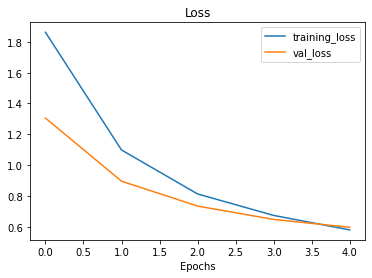

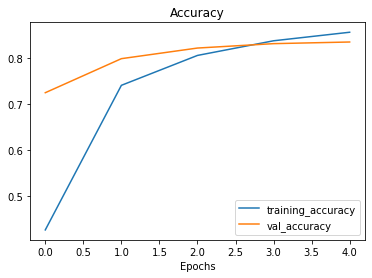

In [15]:
plot_loss_curves(history_10_percent)

In [17]:
# tf.keras.layers.GlobalAveragePooling2D() : 4D 텐서를 2D 텐서로 변환시켜줍니다. 이 때 값들의 평균을 사용합니다.

input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor : {input_tensor}")

random input tensor : [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]


In [18]:
global_average_pooled_tenor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled input tensor : {global_average_pooled_tenor}")

2D global average pooled input tensor : [[-0.09368646 -0.45840445 -0.28855976]]


In [21]:
print(f"{input_tensor.shape}")
print(f"{input_tensor.ndim}")
print(f"{global_average_pooled_tenor.shape}")
print(f"{global_average_pooled_tenor.ndim}")

(1, 4, 4, 3)
4
(1, 3)
2


In [24]:
# Model 0
base_model = tf.keras.applications.ResNet50V2(include_top = False)
# 네트워크의 마지막 레이어 (출력층)를 개발자가 직접 만들겠다. 

base_model.trainable = False
# 사전에 학습한 모델의 모든 가중치를 고정하겠다, 즉 변경하지 않겠다.

inputs = tf.keras.layers.Input(
    shape = (224, 224, 3),
    name = "input_layer"
)

# rescaling, normalization은 모델이 필요할 때 사용합니다.
# efficientnet의 경우는 필요없고, 나머지는 필요합니다.
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)


x = base_model(x)
print(f"base_model의 shape : {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

print(f"global_average_pooling_layer이후의 shape {x.shape}")

outputs = tf.keras.layers.Dense(
    10, 
    activation="softmax", 
    name = "output_layer"
)(x)

model_0 = tf.keras.Model(inputs, outputs)
# Functional API 방식으로 모델을 만든 것입니다.

model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [create_tensorboard_callback(
        "transfer_learning", "10_percent_feature_extract"
    )]
)

base_model의 shape : (None, 7, 7, 2048)
global_average_pooling_layer이후의 shape (None, 2048)
TensorBoard 로그 파일을 저장한 디렉토리 : transfer_learning/10_percent_feature_extract/20210620-091321
c:\200210619_1\venv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 2.0448 - accuracy: 0.3400

KeyboardInterrupt: 

#### 우리는 전이학습의 놀라운 효과를 확인하였습니다! 전체중 10%의 데이터와 5라는 epoch만으로도 거의 90% 가까운 accuracy를 얻었다
#### 1%라면 어떨까?

In [3]:
!wget -q https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

In [5]:
unzip_data("10_food_classes_1_percent.zip")

In [7]:
walk_through_dir("10_food_classes_1_percent")

10_food_classes_1_percent 폴더에는 2개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_1_percent\test 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_1_percent\test\chicken_curry 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\chicken_wings 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\fried_rice 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\grilled_salmon 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\hamburger 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\ice_cream 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\pizza 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\ramen 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\steak 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\sushi 폴더에는 0개의 폴더와 250개의 파일이 존재합니다.
10_food_classes_1_percent\train 폴더에는 10개의 폴더와 0개의 파일이 존재합니다.
10_food_classes_1_percent\train\chicken_curry 폴더에는 0개의 폴더와 7개의 파일이 존재합니다.
10_food_classes_1_percent\train\chicken_win

In [8]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [9]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode = "categorical",
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_percent,
    label_mode = "categorical",
    image_size = IMAGE_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [12]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name = "data_augmentation")

(-0.5, 511.5, 383.5, -0.5)

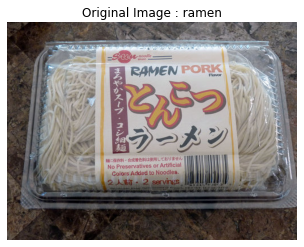

In [18]:
# augmentation된 이미지 확인
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original Image : {target_class}")
plt.axis(False)

(-0.5, 465.5, 348.5, -0.5)

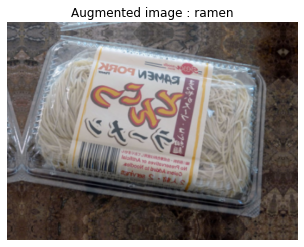

In [19]:
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0)) # ndims = 4, 즉 shape가 (None, height, width, 3)인 것을 필요로 했습니다
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # augmentation한 후에 normailzation을 한 것
plt.title(f"Augmented image : {target_class}")
plt.axis(False)

In [ ]:
# Model 1
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "model_1_input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name = "model_1_global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation = "softmax", name = "model_1_output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_1_percent),
    validation_data = test_data_1_percent,
    validation_steps = len(test_data_1_percent),
    callbacks = [create_tensorboard_callback("transfer_learning", "1_percent_data_augment")]
)